In [ ]:
import gym
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(1000):
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()
env.close()

In [10]:
import gym

env = gym.make('CartPole-v1', render_mode='human')
env.reset()

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())
    
env.close()

d:\tools2\anaconda\envs\gym\lib\site-packages\gym\envs\classic_control\cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


KeyboardInterrupt: 

In [ ]:
import gym
env = gym.make("CliffWalking-v0", render_mode="human")
env.reset()
for _ in range(500):
    env.render()
    env.step(env.action_space.sample())
    
env.close()

In [ ]:
import gym
import numpy as np

# Define the environment
env = gym.make("CliffWalking-v0")

# Define the Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Define the hyperparameters
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1 # exploration rate

# Define the training loop
for episode in range(1000):
  state = env.reset()
  done = False
  
  while not done:
    if np.random.uniform(0, 1) < epsilon:
      # Choose a random action (exploration)
      action = env.action_space.sample()
    else:
      # Choose the action with the highest Q-value (exploitation)
      action = np.argmax(q_table.flatten()[(state * int(env.action_space.n),) : ((state + 1) * int(env.action_space.n),)])

    # Take a step in the environment
    next_state, reward, done, info = env.step(action)
    
    # Update the Q-value for the current state-action pair
    q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]))
    
    # Set the next state as the current state
    state = next_state

# Print the final Q-table
print(q_table)



TypeError: can only concatenate tuple (not "int") to tuple

In [ ]:
help(gym.make)

Help on function make in module gym.envs.registration:

make(id: Union[str, gym.envs.registration.EnvSpec], max_episode_steps: Optional[int] = None, autoreset: bool = False, apply_api_compatibility: Optional[bool] = None, disable_env_checker: Optional[bool] = None, **kwargs) -> gym.core.Env
    Create an environment according to the given ID.
    
    To find all available environments use `gym.envs.registry.keys()` for all valid ids.
    
    Args:
        id: Name of the environment. Optionally, a module to import can be included, eg. 'module:Env-v0'
        max_episode_steps: Maximum length of an episode (TimeLimit wrapper).
        autoreset: Whether to automatically reset the environment after each episode (AutoResetWrapper).
        apply_api_compatibility: Whether to wrap the environment with the `StepAPICompatibility` wrapper that
            converts the environment step from a done bool to return termination and truncation bools.
            By default, the argument is None t

TypeError: Image data of dtype object cannot be converted to float

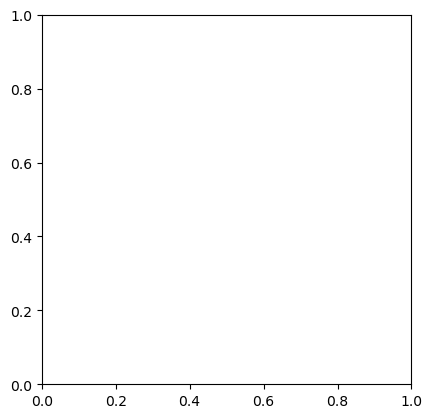

: 

In [ ]:
import gym
import random
import matplotlib.pyplot as plt

"""Create our environment. Basically we define what game we want to play"""
env = gym.make("CliffWalking-v0")

"""Reset our environment, notice it returns the first frame of the game"""
first_frame = env.reset()
plt.imshow(first_frame)

"""Now we can take actions using the env.step function. In breakout the actions are:
    0 = Stay Still
    1 = Start Game/Shoot Ball
    2 = Move Right
    3 = Move Left"""
    
"""I start the game by step(1), then receive the next frame, reward, done, and info"""
next_frame, next_frames_reward, next_state_terminal, info = env.step(1)
plt.imshow(next_frame)
print('Reward Recieved = ' + str(next_frames_reward))
print('Next state is a terminal state: ' + str(next_state_terminal))
print('info[ale.lives] tells us how many lives we have. Lives: ' + str(info['ale.lives']))

"""Now lets take a bunch of random actions and watch the gameplay using render.
If the game ends we will reset it using env.reset"""

for i in range(10000):
    a = random.sample([0,1,2,3] , 1)[0]
    f_p,r,d,info = env.step(a)
    env.render()
    if d == True:
        env.reset()

FROZEN LAKE

In [2]:
import gym

env = gym.make("FrozenLake-v1", render_mode="human",is_slippery=True)
env.action_space.seed(42)
count=0
observation, info = env.reset(seed=42)
rewards=[]
observations=[]
print(env.action_space)
print(env.observation_space)
print(env.reward_range)
for _ in range(1000):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    rewards.append(reward)
    observations.append(observation)
    if reward==1:
        observation, info = env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        print(count+1)
        break
    if terminated or truncated:
        observation, info = env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        count+=1
        rewards=[]
        observations=[]

env.close()

Discrete(4)
Discrete(16)
(0, 1)

The state sequence: [0, 0, 0, 0, 1, 0, 4, 8, 8, 8, 4, 0, 0, 0, 4, 0, 4, 8, 4, 5]
the rewards and total: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.0

The state sequence: [0, 1, 5]
the rewards and total: [0.0, 0.0, 0.0] 0.0

The state sequence: [0, 1, 5]
the rewards and total: [0.0, 0.0, 0.0] 0.0

The state sequence: [1, 0, 4, 8, 12]
the rewards and total: [0.0, 0.0, 0.0, 0.0, 0.0] 0.0

The state sequence: [0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 5]
the rewards and total: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.0


KeyboardInterrupt: 

FROZEN LAKE UPDATED REWARDS

In [3]:
class CustomFrozenLakeEnv(gym.Env):
    def __init__(self, env):
        self.env = env
        
    def step(self, action):
        state, reward, done, info,prob= self.env.step(action)
        # change the reward function here
        if state in [5,7,11,12]:
            reward =-10
        elif state==15:
            reward=10
        else:
            reward = -1 # for example
        #print(state, reward, done, info,prob)
        return state, reward, done, info,prob
    
    def reset(self):
        return self.env.reset()
    
    def render(self):
        return self.env.render()

custom_env = CustomFrozenLakeEnv(env)

In [4]:
import numpy as np
done = False
state = custom_env.reset()
rewards=[]
#while not done:
#    action = np.random.choice([0, 1, 2, 3]) # for example
#    state, reward, done, info,prob = custom_env.step(env.action_space.sample())
 #   custom_env.render()
observations=[]
count=0
for _ in range(1000):
    observation, reward, terminated, truncated, info = custom_env.step(env.action_space.sample())
    rewards.append(reward)
    observations.append(observation)
    if reward==10:
        observation, info = custom_env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        print(count+1)
        break
    if terminated or truncated:
        observation, info = custom_env.reset()
        print("\nThe state sequence:",observations)
        print("the rewards and total:",rewards,sum(rewards))
        count+=1
        rewards=[]
        observations=[]

env.close()


The state sequence: [4, 4, 0, 0, 0, 0, 0, 1, 5]
the rewards and total: [-1, -1, -1, -1, -1, -1, -1, -1, -10] -18

The state sequence: [4, 5]
the rewards and total: [-1, -10] -11

The state sequence: [0, 4, 8, 4, 8, 12]
the rewards and total: [-1, -1, -1, -1, -1, -10] -15

The state sequence: [1, 0, 0, 1, 5]
the rewards and total: [-1, -1, -1, -1, -10] -14

The state sequence: [4, 8, 4, 8, 8, 4, 8, 9, 13, 9, 10, 14, 13, 13, 12]
the rewards and total: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10] -24

The state sequence: [0, 1, 5]
the rewards and total: [-1, -1, -10] -12

The state sequence: [4, 5]
the rewards and total: [-1, -10] -11

The state sequence: [1, 0, 1, 0, 0, 0, 1, 2, 1, 5]
the rewards and total: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -10] -19

The state sequence: [1, 1, 0, 4, 4, 4, 0, 0, 0, 4, 8, 12]
the rewards and total: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -10] -21

The state sequence: [0, 1, 5]
the rewards and total: [-1, -1, -10] -12

The state se

KeyboardInterrupt: 

In [5]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(16)


In [7]:
import numpy as np

env = gym.make("FrozenLake-v1",render_mode="human")
discount_factor = 0.7
P = np.zeros((env.observation_space.n, env.action_space.n, env.observation_space.n))

for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        for transition in env.P[s][a]:
            prob, next_state, reward, done = transition
            P[s, a, next_state] = prob

R = np.zeros((env.observation_space.n, env.action_space.n, env.observation_space.n))
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        for transition in env.P[s][a]:
            prob, next_state, reward, done = transition
            R[s, a, next_state] = reward

def value_iteration(P, R, discount_factor):
    V = np.zeros(env.observation_space.n)
    for i in range(100):
        Q = np.zeros((env.observation_space.n, env.action_space.n))
        for s in range(env.observation_space.n):
            for a in range(env.action_space.n):
                for next_s in range(env.observation_space.n):
                    Q[s, a] += P[s, a, next_s] * (R[s, a, next_s] + discount_factor * V[next_s])
                    
        V = np.max(Q, axis=1)
    return V

# Compute the optimal value function

V = value_iteration(P, R, discount_factor)
print(V)

[0.00449108 0.00515001 0.01243038 0.00378316 0.00960639 0.
 0.03569265 0.         0.02707277 0.07934699 0.14053814 0.
 0.         0.17244764 0.48726667 0.        ]


In [15]:
import numpy as np
import gym

env = gym.make("FrozenLake-v1",render_mode="human")

value_function = np.zeros(env.observation_space.n)
policy = np.zeros(env.observation_space.n)
discount_factor = 0.9

num_iterations = 100
for i in range(num_iterations):
    new_value_function = np.copy(value_function)
    for state in range(env.observation_space.n):
        action_values =np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for transition_prob, next_state, reward, done in env.P[state][action]:
                action_values[action] += transition_prob * (reward + discount_factor * new_value_function[next_state])
        best_action = np.argmax(action_values)
        policy[state] = int(best_action)
        policy=np.asarray(policy,dtype="int")
        new_value_function[state] = action_values[best_action]
    value_function = np.copy(new_value_function)

env.reset()
state=0
print(value_function)
done = False
while not done:
    action = policy[state]
    print(action)
    next_state, reward, done, _,a = env.step(action)
    env.render()
    state = next_state


[0.0688909  0.06141457 0.07440976 0.05580732 0.09185454 0.
 0.11220821 0.         0.14543635 0.24749695 0.29961759 0.
 0.         0.3799359  0.63902015 0.        ]
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
3
3
3
0
3
1
0
1
2
1
1
